MERGE

In [1]:
import os
import shutil
import glob

In [2]:
def getAllFilesInDirectoryAndSubdirectories(directory):
    filelist = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            filelist.append(os.path.join(root,file))
    return filelist

In [3]:
def merge(sourceDirs, outDir, useid=False):
  querycount = 0
  numTuplesFile = open(os.path.join(outDir, "numTuples_merged.csv" ), "a")
  timesFile = open(os.path.join(outDir, "times_results_merged.csv" ), "a")
  if useid:
    idFile = open(os.path.join(outDir, "id_merged.csv" ), "a")

  for sd in sourceDirs:
    files = getAllFilesInDirectoryAndSubdirectories(sd)

    # find and remove numTuples, times, errors
    dirNumTuplesFileName = None
    dirTimesFileName = None
    dirErrorsFileName = None
    dirIdFileName = None
    i = 0
    while i<len(files):
      if "numTuples" in files[i]:
        dirNumTuplesFileName = files[i]
        files.remove(files[i])
        i = i - 1
      elif "results" in files[i]:
        dirTimesFileName = files[i]
        files.remove(files[i])
        i = i - 1
      elif "errors" in files[i]:
        dirErrorsFileName = files[i]
        files.remove(files[i])
        i = i - 1
      elif "id" in files[i] and useid:
        dirIdFileName = files[i]
        files.remove(files[i])
        i = i - 1
      i = i + 1



    files.sort()

    print("NumTuplesFile: ", dirNumTuplesFileName)
    print("TimesFile: ", dirTimesFileName)
    print("All Files: ", files)

    filenames = glob.glob(sd+"/*_explainAnalyze.txt")
    filenames.sort()

    queries = [] 
      
    for f in filenames:
        if os.stat(f).st_size > 0:
            q = f.split("/")[-1].split("_")[0]
            print(q)
            queries.append(q)

            # copy files for this query to outdir
            for fileToCopy in glob.glob(sd+"/"+q+"*"):
                shutil.copy(fileToCopy, outDir)

    querycount = querycount + len(queries)

    dirNumTuplesFile = open(dirNumTuplesFileName)
    dirTimesFile = open(dirTimesFileName)
    if useid:
        dirIdFile = open(dirIdFileName)

    for numTuplesLine in dirNumTuplesFile.readlines():
        if any(qu in numTuplesLine for qu in queries):
            numTuplesFile.write(numTuplesLine)

    for timesLine in dirTimesFile.readlines():
        if any(qu in timesLine for qu in queries):
            timesFile.write(timesLine)

    if useid:
        for idLine in dirIdFile.readlines():
            if any(qu in idLine for qu in queries):
                idFile.write(idLine)
                
  numTuplesFile.close()
  timesFile.close()
  if useid:
    idFile.close()

  print(querycount)










In [4]:
srcDirs = [x[0] for x in os.walk("./out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/")][1:]
srcDirs.sort()
srcDirs

['./out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_10:50:20.051723',
 './out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_11:12:22.457637',
 './out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_11:28:21.660909',
 './out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_12:04:18.954684',
 './out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_12:23:21.913050',
 './out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_12:39:17.202654',
 './out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_13:46:49.790169',
 './out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_14:02:46.160045',
 './out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_14:18:48.517159',
 './out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_14:36:26.425354',
 './out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_15:07:32.999004',
 './out/ru

In [5]:
srcDirs2 = [x[0] for x in os.walk("./out/runYan_basic_56GiBMem_b39216c_20230905/full/1/")][1:]
srcDirs2.sort()
srcDirs2

['./out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-05_22:01:12.055077',
 './out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-05_22:22:15.442272',
 './out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-05_22:38:15.066393',
 './out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-05_22:58:04.157865',
 './out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-05_23:15:46.447456',
 './out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-05_23:34:57.156960',
 './out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-05_23:50:52.452509',
 './out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-06_00:31:30.832254',
 './out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-06_01:01:29.248993',
 './out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-06_01:47:50.662039',
 './out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-06_02:03:45.948337',
 './out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-06_02:19:47.933302',
 './

In [6]:
merge(srcDirs, "./mergeout/noMockCTE", useid = True)

NumTuplesFile:  ./out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_10:50:20.051723/numTuples_results_2023-09-08_10:50:20.051723.txt
TimesFile:  ./out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_10:50:20.051723/times_results_2023-09-08_10:50:20.051723.txt
All Files:  ['./out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_10:50:20.051723/02aa_explain.txt', './out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_10:50:20.051723/02aa_explainAnalyze.txt', './out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_10:50:20.051723/02ab_explain.txt', './out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_10:50:20.051723/02ab_explainAnalyze.txt', './out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_10:50:20.051723/02ac_explain.txt', './out/runYan_extNoMockCTE_56GiBMem_08b45ad_20230908/full/1/2023-09-08_10:50:20.051723/02ac_explainAnalyze.txt', './out/runYan_extNoMockCTE_56GiBMem_

In [7]:
merge(srcDirs2, "./mergeout/basic/", useid = True)

NumTuplesFile:  ./out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-05_22:01:12.055077/numTuples_results_2023-09-05_22:01:12.055077.txt
TimesFile:  ./out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-05_22:01:12.055077/times_results_2023-09-05_22:01:12.055077.txt
All Files:  ['./out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-05_22:01:12.055077/02aa_explain.txt', './out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-05_22:01:12.055077/02aa_explainAnalyze.txt', './out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-05_22:01:12.055077/02ab_explain.txt', './out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-05_22:01:12.055077/02ab_explainAnalyze.txt', './out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-05_22:01:12.055077/02ac_explain.txt', './out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-05_22:01:12.055077/02ac_explainAnalyze.txt', './out/runYan_basic_56GiBMem_b39216c_20230905/full/1/2023-09-05_22:01:12.055077/02ad_explain

In [8]:
# remove timeouts for which a valid entry exists in the next line
def cleanupTimeouts(dir):
  with open(os.path.join(dir, "numTuples_merged.csv"), "r") as f:
    lines = f.readlines()
  with open(os.path.join(dir,"numTuples_merged_new.csv"), "w") as f:
    i = 0
    while i < len(lines):
      if "Timeout" in lines[i] and i+1<len(lines) and lines[i].split(";")[0].split("/")[-1].replace(".sql", "") == lines[i+1].split(";")[0].split("/")[-1]:
        print("skip row")
      else:
        f.write(lines[i])
      #if "Timeout" not in lines[i]:# or i+1<len(lines) and lines[i].split(";")[0].split("/")[-1] == lines[i+1].split(";")[0].split("/")[-1]:
      #  f.write(lines[i])
      i = i + 1

  with open(os.path.join(dir, "times_results_merged.csv"), "r") as f:
    lines = f.readlines()
  with open(os.path.join(dir,"times_results_merged_new.csv"), "w") as f:
    i = 0
    while i < len(lines):
      if "Timeout" in lines[i] and i+1<len(lines) and lines[i].split(";")[0].split("/")[-1].replace(".sql", "") == lines[i+1].split(";")[0].split("/")[-1]:
        print("skip row")
      else:
        f.write(lines[i])
     # if "Timeout" not in lines[i]:# or i+1<len(lines) and lines[i].split(";")[0].split("/")[-1] == lines[i+1].split(";")[0].split("/")[-1]:
     #   f.write(lines[i])
      i = i + 1

In [9]:
def refreshFiles(dir):
  os.remove(os.path.join(dir, "numTuples_merged.csv"))
  os.remove(os.path.join(dir, "times_results_merged.csv"))
  os.rename(os.path.join(dir, "numTuples_merged_new.csv"), os.path.join(dir, "numTuples_merged.csv"))
  os.rename(os.path.join(dir, "times_results_merged_new.csv"), os.path.join(dir, "times_results_merged.csv"))

AGGREGATE

In [10]:
import glob
import numpy as np

In [11]:
def openFileByWildcard(wc):
  for filename in glob.glob(wc):
    f = open(filename, 'r')
    return f

In [12]:
def getQueryName(s):
  return s.split(";")[0].split("/")[-1].replace(".sql", "")


In [13]:
def getNextLine(fileList):
  res = []
  for f in fileList:
    if f != None:
      res.append(f.readline())
    else:
      res.append("")

  return res

In [14]:
def getNextQueries(fileList):
  res = []
  lines = getNextLine(fileList)
  for l in lines:
    if l != "":
      res.append(getQueryName(l))
    else:
      res.append("")
  return res

In [15]:
def findNextLowerQuery(nextLines):
  j = 0
  while nextLines[j]=="": # get first line with content as starting point
    if j == len(nextLines)-1:
      return (None, None)
    j = j + 1
  lowest = getQueryName(nextLines[j])
  lowestIndex = j
  duplicates = [j]


  for i in range(j+1,len(nextLines)): # for all other lines, check if there is a matching query, or a previous query
    if nextLines[i].strip() != "":
      qn = getQueryName(nextLines[i])
      if qn == lowest:
        duplicates.append(i)
        continue
      if qn < lowest:
        lowest = qn
        lowestIndex = i
        duplicates = [i]

  return (lowest, duplicates)

In [16]:
def aggResults(dirList, outDir):
  timesResultsOut = open(os.path.join(outDir, "times_results_agg.csv"), "w")
  timesResultsFiles = []
  for d in dirList:
    timesResultsFiles.append(openFileByWildcard(os.path.join(d, "times_results_*")))
  print(timesResultsFiles)

  nextLines = getNextLine(timesResultsFiles)
  print(nextLines)

  (queryName, indices) = findNextLowerQuery(nextLines)
  print((queryName, indices))

  while (queryName, indices) != (None, None):

    relevantItems = []
    for i in range(0,len(nextLines)):
      if i in indices:
        print(nextLines[i])
        time = nextLines[i].split(";")[1]
        if "time:" in time:
          time = time.split(":")[1]
          if "m" in time:
            parts = time.split("m")
            print(parts)
            time = float(parts[0]) * 60 + float(parts[1].split("s")[0])
          else:
            time = float(time.split("s")[0])
          relevantItems.append(time)
        else:
          relevantItems.append(float('inf'))

    nums = np.array(relevantItems)
    print(nums)
    minind = nums.argmin(axis=0) # change to max here to get the max
    print(minind)
    print(indices[minind]) # this is the actual index under the directories
    # save queryName, time to out, copy plan to out
    timesResultsOut.write(queryName + ";" + str(nums[minind])+ "\n")

    shutil.copy(os.path.join(dirList[indices[minind]], queryName + "_explainAnalyze.txt"), outDir)

    # read next lines for the indices of the previous value
    print(nextLines)
    for i in indices:
      nextLines[i] = getNextLine([timesResultsFiles[i]])[0]
    print(nextLines)

    (queryName, indices) = findNextLowerQuery(nextLines)
    print((queryName, indices))



  # (queryName, indices) == None, None --> no more data to work on!





In [17]:
#aggResults(["/content/in/c/", "/content/in/d/", "/content/out/1/"], "/content/out/2")

COUNTING TEST

In [18]:
def getResultCount(s):
  return s.split(";")[1].strip()

In [19]:
def checkValidityByNumberOfResults(dira, dirb):
  numTuplesA = openFileByWildcard(os.path.join(dira, "numTuples_*"))
  numTuplesB = openFileByWildcard(os.path.join(dirb, "numTuples_*"))

  nla = getNextLine([numTuplesA])[0]
  nlb = getNextLine([numTuplesB])[0]

  while nla != "" and nlb != "":
    qna = getQueryName(nla)
    qnb = getQueryName(nlb)
    if qna == qnb: # compare
      resa = getResultCount(nla)
      resb = getResultCount(nlb)
      if "Timeout" in resa:
        nla = getNextLine([numTuplesA])[0]
      elif "Timeout" in resb: # at least one was timed out --> cannot compare
        nlb = getNextLine([numTuplesB])[0]
      else: # no timeout --> compare
        if int(resa) == int(resb):
          print(qna + " Valid")
        else:
          raise Exception(qna + " is Invalid!")
        nla = getNextLine([numTuplesA])[0]
        nlb = getNextLine([numTuplesB])[0]
    elif qna<qnb: # go further for qna
      nla = getNextLine([numTuplesA])[0]
    elif qna>qnb: # go futher for qnb
      nlb = getNextLine([numTuplesB])[0]

In [20]:
checkValidityByNumberOfResults("./mergeout/noMockCTE/", "./mergeout/basic/")

02aa Valid
02ab Valid
02ac Valid
02ad Valid
02ae Valid
02af Valid
02ag Valid
02ah Valid
02ai Valid
02aj Valid
02ak Valid
02al Valid
02am Valid
02an Valid
02ao Valid
03aa Valid
03ab Valid
03ac Valid
03ad Valid
03ae Valid
03af Valid
03ag Valid
03ah Valid
03ai Valid
03aj Valid
03ak Valid
03al Valid
03an Valid
03ao Valid
04ab Valid
04ac Valid
04ad Valid
04ae Valid
04af Valid
04ag Valid
04ah Valid
04ai Valid
04aj Valid
04ak Valid
04al Valid
04am Valid
04an Valid
04ao Valid
05aa Valid
05ab Valid
05ac Valid
05ad Valid
05ae Valid
05af Valid
05ag Valid
05ah Valid
05ai Valid
05aj Valid
05ak Valid
05al Valid
05am Valid
05an Valid
05ao Valid
06aa Valid
06ab Valid
06ad Valid
06ae Valid
06af Valid
06ag Valid
06ah Valid
06ai Valid
06aj Valid
06ak Valid
06am Valid
06an Valid
06ao Valid
07aa Valid
07ab Valid
07ac Valid
07ad Valid
07ae Valid
07af Valid
07ag Valid
07ah Valid
07ai Valid
07aj Valid
07ak Valid
07an Valid
07ao Valid
08aa Valid
08ab Valid
08ac Valid
08ad Valid
08ae Valid
08af Valid
08ag Valid

In [21]:
def checkValidityByResults(dira, dirb):
  filesA = glob.glob(os.path.join(dira, "[0-3][0-9][a-z][a-z]_scaRes.txt"))
  filesB = glob.glob(os.path.join(dirb, "[0-3][0-9][a-z][a-z]_scaRes.txt"))

  indA = 0;
  indB = 0;

  while indA < len(filesA) and indB < len(filesB):
    fnA = filesA[indA].split("/")[-1].replace("_scaRes.txt", "")
    fnB = filesB[indB].split("/")[-1].replace("_scaRes.txt", "")
    if fnA == fnB: # compare
      fA = [line.rstrip('\n') for line in open(fnA, 'r')]
      fB = [line.rstrip('\n') for line in open(fnB, 'r')]
      if fA == fB:
        print(fnA + " Valid")
      else:
        raise Exception(fnA + " is Invalid!")
      indA = indA + 1
      indB = indB + 1
    elif fnA<fnB: # increment indA
      indA = indA + 1
    elif fnA>fnB: # increment indB
      indB = indB + 1





In [22]:
queries = ['02aa', '02ab', '02ac', '02ad', '02ae', '02af', '02ag', '02ah', '02ai', '02aj', '02ak', '02al', '02am', '02an', '02ao', '03aa', '03ab', '03ac', '03ad', '03ae', '03af', '03ag', '03ah', '03ai', '03aj', '03ak', '03al', '03am', '03an', '03ao', '04aa', '04ab', '04ac', '04ad', '04ae', '04af', '04ag', '04ah', '04ai', '04aj', '04ak', '04al', '04am', '04an', '04ao', '05aa', '05ab', '05ac', '05ad', '05ae', '05af', '05ag', '05ah', '05ai', '05aj', '05ak', '05al', '05am', '05an', '05ao', '06aa', '06ab', '06ac', '06ad', '06ae', '06af', '06ag', '06ah', '06ai', '06aj', '06ak', '06al', '06am', '06an', '06ao', '07aa', '07ab', '07ac', '07ad', '07ae', '07af', '07ag', '07ah', '07ai', '07aj', '07ak', '07al', '07am', '07an', '07ao', '08aa', '08ab', '08ac', '08ad', '08ae', '08af', '08ag', '08ah', '08ai', '08aj', '08ak', '08al', '08am', '08an', '08ao', '09aa', '09ab', '09ac', '09ad', '09ae', '09af', '09ag', '09ah', '09ai', '09aj', '09ak', '09al', '09am', '09an', '09ao', '10aa', '10ab', '10ac', '10ad', '10ae', '10af', '10ag', '10ah', '10ai', '10aj', '10ak', '10al', '10am', '10an', '10ao', '11aa', '11ab', '11ac', '11ad', '11ae', '11af', '11ag', '11ah', '11ai', '11aj', '11ak', '11al', '11am', '11an', '11ao', '12aa', '12ab', '12ac', '12ad', '12ae', '12af', '12ag', '12ah', '12ai', '12aj', '12ak', '12al', '12am', '12an', '12ao', '13aa', '13ab', '13ac', '13ad', '13ae', '13af', '13ag', '13ah', '13ai', '13aj', '13ak', '13al', '13am', '13an', '13ao', '14aa', '14ab', '14ac', '14ad', '14ae', '14af', '14ag', '14ah', '14ai', '14aj', '14ak', '14al', '14am', '14an', '14ao', '15aa', '15ab', '15ac', '15ad', '15ae', '15af', '15ag', '15ah', '15ai', '15aj', '15ak', '15al', '15am', '15an', '15ao', '16aa', '16ab', '16ac', '16ad', '16ae', '16af', '16ag', '16ah', '16ai', '16aj', '16ak', '16al', '16am', '16an', '16ao', '17aa', '17ab', '17ac', '17ad', '17ae', '17af', '17ag', '17ah', '17ai', '17aj', '17ak', '17al', '17am', '17an', '17ao', '18aa', '18ab', '18ac', '18ad', '18ae', '18af', '18ag', '18ah', '18ai', '18aj', '18ak', '18al', '18am', '18an', '18ao', '19aa', '19ab', '19ac', '19ad', '19ae', '19af', '19ag', '19ah', '19ai', '19aj', '19ak', '19al', '19am', '19an', '19ao', '20aa', '20ab', '20ac', '20ad', '20ae', '20af', '20ag', '20ah', '20ai', '20aj', '20ak', '20al', '20am', '20an', '20ao', '21aa', '21ab', '21ac', '21ad', '21ae', '21af', '21ag', '21ah', '21ai', '21aj', '21ak', '21al', '21am', '21an', '21ao', '22aa', '22ab', '22ac', '22ad', '22ae', '22af', '22ag', '22ah', '22ai', '22aj', '22ak', '22al', '22am', '22an', '22ao', '23aa', '23ab', '23ac', '23ad', '23ae', '23af', '23ag', '23ah', '23ai', '23aj', '23ak', '23al', '23am', '23an', '23ao', '24aa', '24ab', '24ac', '24ad', '24ae', '24af', '24ag', '24ah', '24ai', '24aj', '24ak', '24al', '24am', '24an', '24ao', '25aa', '25ab', '25ac', '25ad', '25ae', '25af', '25ag', '25ah', '25ai', '25aj', '25ak', '25al', '25am', '25an', '25ao', '26aa', '26ab', '26ac', '26ad', '26ae', '26af', '26ag', '26ah', '26ai', '26aj', '26ak', '26al', '26am', '26an', '26ao', '27aa', '27ab', '27ac', '27ad', '27ae', '27af', '27ag', '27ah', '27ai', '27aj', '27ak', '27al', '27am', '27an', '27ao', '28aa', '28ab', '28ac', '28ad', '28ae', '28af', '28ag', '28ah', '28ai', '28aj', '28ak', '28al', '28am', '28an', '28ao', '29aa', '29ab', '29ac', '29ad', '29ae', '29af', '29ag', '29ah', '29ai', '29aj', '29ak', '29al', '29am', '29an', '29ao', '30aa', '30ab', '30ac', '30ad', '30ae', '30af', '30ag', '30ah', '30ai', '30aj', '30ak', '30al', '30am', '30an', '30ao']
def fillMissingValues(rows):
    i = 0
    retRows=[]
    ind = 0
    while ind < len(rows):
        if not queries[i] in rows[ind]:
            #print(queries[i] + "|||" + rows[ind])
            #print("--- " + queries[i] + "; Timeout")
            retRows.append(queries[i] + "; Timeout" ) 
        else:
            #print(queries[i] + "|||" + rows[ind])
            #print("--- " + rows[ind])
            retRows.append(rows[ind])
            ind = ind + 1
        i=i+1
    while i<len(queries):
        retRows.append(queries[i] + "; Timeout" ) 
        i = i + 1
    return retRows
            

In [23]:
queries = ['02aa', '02ab', '02ac', '02ad', '02ae', '02af', '02ag', '02ah', '02ai', '02aj', '02ak', '02al', '02am', '02an', '02ao', '03aa', '03ab', '03ac', '03ad', '03ae', '03af', '03ag', '03ah', '03ai', '03aj', '03ak', '03al', '03am', '03an', '03ao', '04aa', '04ab', '04ac', '04ad', '04ae', '04af', '04ag', '04ah', '04ai', '04aj', '04ak', '04al', '04am', '04an', '04ao', '05aa', '05ab', '05ac', '05ad', '05ae', '05af', '05ag', '05ah', '05ai', '05aj', '05ak', '05al', '05am', '05an', '05ao', '06aa', '06ab', '06ac', '06ad', '06ae', '06af', '06ag', '06ah', '06ai', '06aj', '06ak', '06al', '06am', '06an', '06ao', '07aa', '07ab', '07ac', '07ad', '07ae', '07af', '07ag', '07ah', '07ai', '07aj', '07ak', '07al', '07am', '07an', '07ao', '08aa', '08ab', '08ac', '08ad', '08ae', '08af', '08ag', '08ah', '08ai', '08aj', '08ak', '08al', '08am', '08an', '08ao', '09aa', '09ab', '09ac', '09ad', '09ae', '09af', '09ag', '09ah', '09ai', '09aj', '09ak', '09al', '09am', '09an', '09ao', '10aa', '10ab', '10ac', '10ad', '10ae', '10af', '10ag', '10ah', '10ai', '10aj', '10ak', '10al', '10am', '10an', '10ao', '11aa', '11ab', '11ac', '11ad', '11ae', '11af', '11ag', '11ah', '11ai', '11aj', '11ak', '11al', '11am', '11an', '11ao', '12aa', '12ab', '12ac', '12ad', '12ae', '12af', '12ag', '12ah', '12ai', '12aj', '12ak', '12al', '12am', '12an', '12ao', '13aa', '13ab', '13ac', '13ad', '13ae', '13af', '13ag', '13ah', '13ai', '13aj', '13ak', '13al', '13am', '13an', '13ao', '14aa', '14ab', '14ac', '14ad', '14ae', '14af', '14ag', '14ah', '14ai', '14aj', '14ak', '14al', '14am', '14an', '14ao', '15aa', '15ab', '15ac', '15ad', '15ae', '15af', '15ag', '15ah', '15ai', '15aj', '15ak', '15al', '15am', '15an', '15ao', '16aa', '16ab', '16ac', '16ad', '16ae', '16af', '16ag', '16ah', '16ai', '16aj', '16ak', '16al', '16am', '16an', '16ao', '17aa', '17ab', '17ac', '17ad', '17ae', '17af', '17ag', '17ah', '17ai', '17aj', '17ak', '17al', '17am', '17an', '17ao', '18aa', '18ab', '18ac', '18ad', '18ae', '18af', '18ag', '18ah', '18ai', '18aj', '18ak', '18al', '18am', '18an', '18ao', '19aa', '19ab', '19ac', '19ad', '19ae', '19af', '19ag', '19ah', '19ai', '19aj', '19ak', '19al', '19am', '19an', '19ao', '20aa', '20ab', '20ac', '20ad', '20ae', '20af', '20ag', '20ah', '20ai', '20aj', '20ak', '20al', '20am', '20an', '20ao', '21aa', '21ab', '21ac', '21ad', '21ae', '21af', '21ag', '21ah', '21ai', '21aj', '21ak', '21al', '21am', '21an', '21ao', '22aa', '22ab', '22ac', '22ad', '22ae', '22af', '22ag', '22ah', '22ai', '22aj', '22ak', '22al', '22am', '22an', '22ao', '23aa', '23ab', '23ac', '23ad', '23ae', '23af', '23ag', '23ah', '23ai', '23aj', '23ak', '23al', '23am', '23an', '23ao', '24aa', '24ab', '24ac', '24ad', '24ae', '24af', '24ag', '24ah', '24ai', '24aj', '24ak', '24al', '24am', '24an', '24ao', '25aa', '25ab', '25ac', '25ad', '25ae', '25af', '25ag', '25ah', '25ai', '25aj', '25ak', '25al', '25am', '25an', '25ao', '26aa', '26ab', '26ac', '26ad', '26ae', '26af', '26ag', '26ah', '26ai', '26aj', '26ak', '26al', '26am', '26an', '26ao', '27aa', '27ab', '27ac', '27ad', '27ae', '27af', '27ag', '27ah', '27ai', '27aj', '27ak', '27al', '27am', '27an', '27ao', '28aa', '28ab', '28ac', '28ad', '28ae', '28af', '28ag', '28ah', '28ai', '28aj', '28ak', '28al', '28am', '28an', '28ao', '29aa', '29ab', '29ac', '29ad', '29ae', '29af', '29ag', '29ah', '29ai', '29aj', '29ak', '29al', '29am', '29an', '29ao', '30aa', '30ab', '30ac', '30ad', '30ae', '30af', '30ag', '30ah', '30ai', '30aj', '30ak', '30al', '30am', '30an', '30ao']
def fillMissingQueryValues(q, values):
    i = 0
    retRows=[]
    ind = 0
    while ind < len(values):
        if q[ind]>queries[i]:
            retRows.append(float(0))
        else:
            retRows.append(values[ind])
            ind = ind + 1
        i=i+1
    while i<len(queries):
        retRows.append(float(0))
        i = i + 1
    return queries, retRows

In [24]:
def parseTimeToMS(timestring):
    if "time:" in timestring:
        timestring = timestring.replace("time:", "")
    if "Timeout" in timestring or "timeout" in timestring:
        return 9999999999.0
    if "m" in timestring and "ms" not in timestring: # xmx.xs
        m = timestring.split("m")
        return ((float(m[0])*60) + float(m[1].split("s")[0]) ) * 1000
    elif "ms" in timestring: # xx.xms
        return float(timestring.split("ms")[0])
    elif "s" in timestring: # x.xxs
        return float(timestring.split("s")[0]) * 1000
    
        
        

In [25]:
import re
def getMaxMem(mergedir, logfile):
    # get queries and timestamps into the two lists
    idFile = openFileByWildcard(os.path.join(mergedir, "id*"))
    queries = []
    timestamps = []
    maxmemlist = []
    maxdisklist = []
    for idline in idFile.readlines():
        parts = idline.replace("/*", "").replace("*/", "").split(",")
        query = parts[0].split("/")[-1].replace(".sql", "").strip()
        ts = parts[1].split(":")[1].strip()
        queries.append(query)
        timestamps.append(ts)

    queryid = 0
    with open(logfile, "r") as log:
        while queryid < len(queries):
            l = log.readline()
            if not l:
                break
            if "Query Info" in l and timestamps[queryid] in l and queries[queryid] in l:
                #print(l)
                memmaxstart = l.find('mem_max="') + len('mem_max="')
                memmaxend = l.find(' Bytes', memmaxstart)
                diskmaxstart = l.find('disk_max="') + len('disk_max="')
                diskmaxend = l.find(' Bytes', diskmaxstart)
                maxmemlist.append(float(l[memmaxstart:memmaxend]))
                maxdisklist.append(float(l[diskmaxstart:diskmaxend]))
                queryid = queryid + 1
    return (queries, maxmemlist, maxdisklist)
            

In [26]:
(queries1, maxmemlist1, maxdisklist1) = getMaxMem("./mergeout/noMockCTE/", "./tidb_IP_4000_extNoMockCTE.log")
(queries2, maxmemlist2, maxdisklist2) = getMaxMem("./mergeout/basic/", "./tidb_IP_4000_basic.log")

In [27]:
(_, maxmemlist1) = fillMissingQueryValues(queries1, maxmemlist1)
(queries1, maxdisklist1) = fillMissingQueryValues(queries1, maxdisklist1)
(_, maxmemlist2) = fillMissingQueryValues(queries2, maxmemlist2)
(queries2, maxdisklist2) = fillMissingQueryValues(queries2, maxdisklist2)


In [28]:
l = []
for i in range(len(maxmemlist1)):
    l.append((maxmemlist1[i], maxmemlist2[i], (maxmemlist1[i]- maxmemlist2[i])/1000000))

l

[(1466127620.0, 1466170142.0, -0.042522),
 (622502923.0, 568974309.0, 53.528614),
 (206456836.0, 206456342.0, 0.000494),
 (57661504730.0, 47417691624.0, 10243.813106),
 (3433654044.0, 16004956210.0, -12571.302166),
 (3823359348.0, 3070311274.0, 753.048074),
 (289400541.0, 264487427.0, 24.913114),
 (509976512.0, 509742158.0, 0.234354),
 (2555800959.0, 264418915.0, 2291.382044),
 (377213986.0, 317587127.0, 59.626859),
 (19842293.0, 19842299.0, -6e-06),
 (131470386.0, 131461816.0, 0.00857),
 (17030828526.0, 2937551870.0, 14093.276656),
 (44489620.0, 36668277.0, 7.821343),
 (27456412399.0, 26710444507.0, 745.967892),
 (391654951.0, 135921888.0, 255.733063),
 (26404883.0, 26404807.0, 7.6e-05),
 (2532305658.0, 2376471529.0, 155.834129),
 (1749520978.0, 1139447721.0, 610.073257),
 (590284209.0, 431135084.0, 159.149125),
 (104686093.0, 99578661.0, 5.107432),
 (19999975.0, 19999914.0, 6.1e-05),
 (24648869.0, 24376060.0, 0.272809),
 (267833312.0, 634889694.0, -367.056382),
 (606587495.0, 1118822

In [29]:
np.average([float(0) if e[0] == float(0) or e[1] == float(0) else e[2] for e in l]) # pos --> MockCTE better

262.5918950597701

Evaluation / Graphics

In [30]:
import matplotlib.pyplot as plt

In [31]:
def scatterplot(x,y, xlabel, ylabel, title, pathToSave):
  plt.scatter(x, y, s=10)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  plt.xlim(0,60)
  plt.ylim(0,60)
  plt.plot([0,60], [0,60], color = 'red', linewidth=0.4, zorder=0) # red
  #fig, ax = plt.subplots()
  #plt.axline((0, 0), slope=1)
  #ax.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

  plt.savefig(pathToSave)
  plt.show()

In [32]:
def scatterplot2(x,y, xlabel, ylabel, title, pathToSave):
  plt.scatter(x, y, s=10)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  plt.xlim(0,6000)
  plt.ylim(0,6000)
  plt.plot([0,6000], [0,6000], color = 'red', linewidth=0.4, zorder=0) # red
  #fig, ax = plt.subplots()
  #plt.axline((0, 0), slope=1)
  #ax.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

  plt.savefig(pathToSave)
  plt.show()

In [33]:
def scatterplotWithLim(x,y, xlabel, ylabel, title, pathToSave, xlim, ylim):
  plt.scatter(x, y, s=10)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  plt.xlim(0,xlim)
  plt.ylim(0,ylim)
  plt.plot([0,xlim], [0,ylim], color = 'red', linewidth=0.4, zorder=0) # red
  #fig, ax = plt.subplots()
  #plt.axline((0, 0), slope=1)
  #ax.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

  plt.savefig(pathToSave)
  plt.show()

In [34]:
def scatterplot3(x,y, xlabel, ylabel, title, pathToSave):
  plt.scatter(x, y, s=10)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  plt.xlim(0,900000)
  plt.ylim(0,900000)
  plt.plot([0,900000], [0,900000], color = 'red', linewidth=0.4, zorder=0) # red
  #fig, ax = plt.subplots()
  #plt.axline((0, 0), slope=1)
  #ax.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

  plt.savefig(pathToSave)
  plt.show()

In [35]:
def count(val_a, val_b):
    c1=0
    c2=0
    for i in range(len(val_a)):
        if val_a[i] == 0 or val_b[i]==0:
            continue
        if val_a[i] < val_b[i]:
            c1 = c1 + 1;
        elif val_a[i] > val_b[i]:
            c2 = c2 + 1;
    return (c1,c2)
        

In [36]:
def countRT(val_a, val_b): # exclude the unsolved values!
    c1=0
    c2=0
    for i in range(len(val_a)):
        if val_a[i] == 9999999999.0 or val_b[i] == 9999999999.0:
            continue
        if val_a[i] < val_b[i]:
            c1 = c1 + 1;
        elif val_a[i] > val_b[i]:
            c2 = c2 + 1;
    return (c1,c2)

In [37]:
def diffPlot2(normal, yan, xlabel, ylabel, title, pathToSave, xticks):
  diffs = np.subtract(np.array(yan), np.array(normal))
  print(diffs)
  x = [x for x in range(0,len(normal))]
  plt.scatter(x, diffs)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  #plt.grid()
  fig, ax = plt.subplots()
  fig.set_size_inches(20, 10)
  print(np.min(diffs))
  plt.yscale('symlog')
  plt.ylim(np.min(diffs)-5,np.max(diffs)+5)
  plt.xlim(-0.5,len(normal)+0.5-100)

  plt.xticks(x, labels=xticks)

  for i in range(0,len(normal)):
    if diffs[i]>0:
      #plt.fill_between(i, diffs[i], facecolor='green', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'g', alpha=.5)
    elif diffs[i]<0:
      #plt.fill_between(i, diffs[i], facecolor='red', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'r', alpha=.5)

  plt.savefig(pathToSave)
  plt.show()

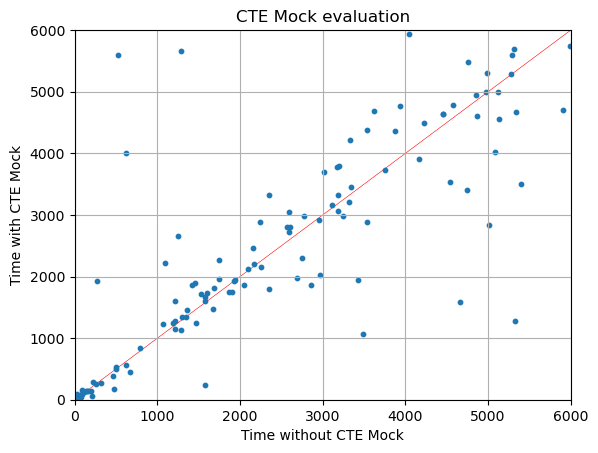

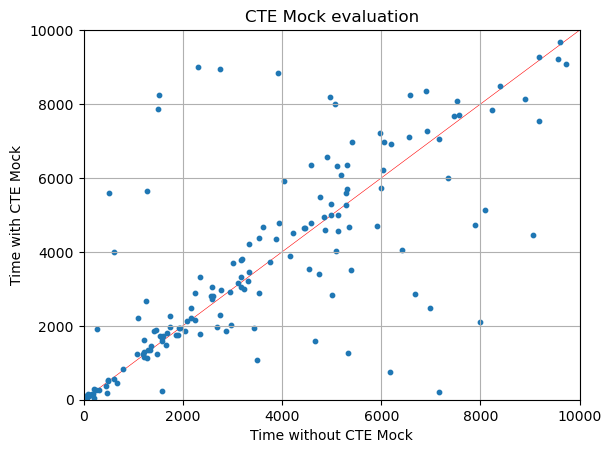

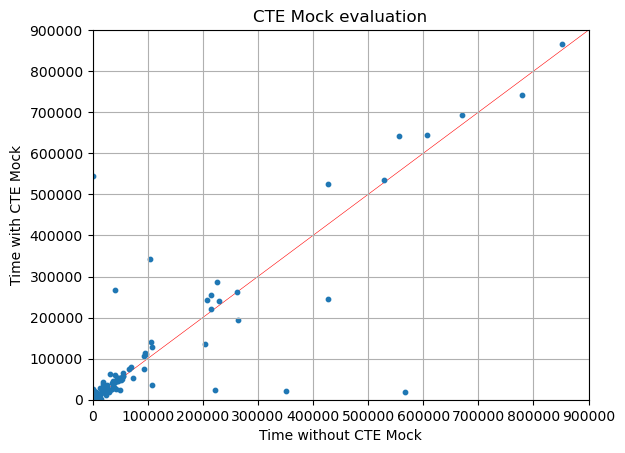

[ 6.00000000e+02  2.10000000e+02  7.00000000e+01 -6.73000000e+04
  1.51000000e+04  2.10000000e+02  4.00000000e+01  1.00000000e+02
 -1.49000000e+03  3.00000000e+01  5.40000000e+00  4.08000000e+01
 -1.29000000e+04 -1.14000000e+01  8.90000000e+03  1.00000000e+01
  8.70000000e+00  9.30000000e+02  7.00000000e+01 -1.20000000e+02
 -7.66000000e+01 -6.00000000e-01 -4.59000000e+01 -1.40000000e+03
 -6.40000000e+02  2.02000000e+01  6.40000000e+02  0.00000000e+00
  3.60000000e+00  4.50000000e+02  0.00000000e+00 -5.62000000e+01
 -1.20000000e+02  3.50000000e+02  1.50000000e+02  6.29000000e+01
  6.40000000e+03  1.24500000e+04 -9.40000000e+02 -1.00000000e+02
 -2.60000000e+02 -6.00000000e+01  1.50000000e+03 -4.00000000e+01
 -3.66000000e+01  1.40000000e+02 -4.00000000e+00 -2.17000000e+04
  1.19000000e+01  6.00000000e+01  4.10000000e+03  6.00000000e+02
  2.10000000e+02 -1.54700000e+02  4.40000000e+02  1.00000000e+01
 -1.50000000e+02  8.90000000e+02  1.60000000e+03  1.04000000e+03
  1.60000000e+02 -2.42000

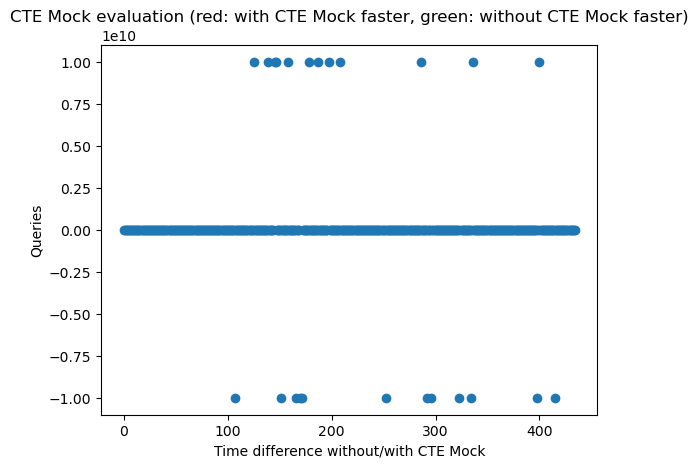

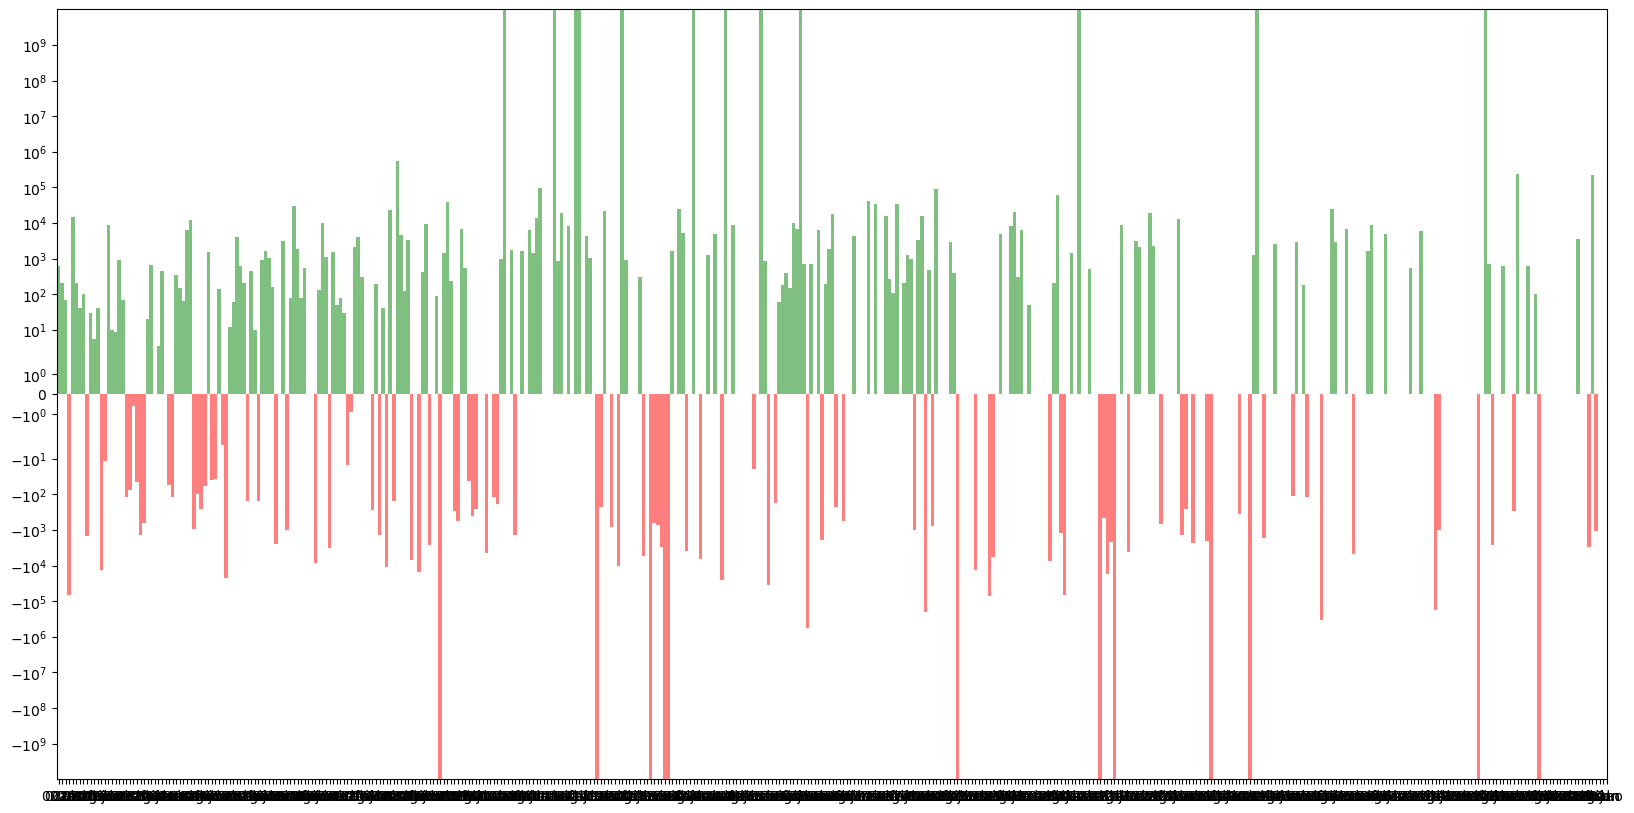

In [38]:
l_a = openFileByWildcard(os.path.join("./mergeout/noMockCTE/", "times_results*")).readlines()
l_b = openFileByWildcard(os.path.join("./mergeout/basic/", "times_results*")).readlines()

l_a = fillMissingValues(l_a)
l_b = fillMissingValues(l_b)

val_a = [parseTimeToMS(r.split(";")[1]) for r in l_a]
val_b = [parseTimeToMS(r.split(";")[1]) for r in l_b]

scatterplot2(val_a, val_b, "Time without CTE Mock", "Time with CTE Mock", "CTE Mock evaluation", "./CTEMockEvalScatterPlot.png")
scatterplotWithLim(val_a, val_b, "Time without CTE Mock", "Time with CTE Mock", "CTE Mock evaluation", "./CTEMockEval10kScatterPlot.png", 10000, 10000)
scatterplotWithLim(val_a, val_b, "Time without CTE Mock", "Time with CTE Mock", "CTE Mock evaluation", "./CTEMockEval900kScatterPlot.png", 900000, 900000)

diffPlot2(val_a, val_b, "Time difference without/with CTE Mock", "Queries", "CTE Mock evaluation (red: with CTE Mock faster, green: without CTE Mock faster)", "./CTEMockEvalDiffPlot.png", queries)




In [39]:
a = np.array(val_a)
b = np.array(val_b)

# remove not solved
a[a==9999999999.0]=0
b[b==9999999999.0]=0

# both solved --> does not fully describe the situation
ind = []
for j in range(len(a)):
    if a[j] == 0 or b[j] == 0:
        ind.append(j)
    j = j + 1

a = np.delete(a, ind)
b = np.delete(b, ind)


diffs = np.subtract(a, b)
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in ms")
print(f"minimal difference (with sign --> best w/o CTEMock): {min}, maximal difference (with sign --> best with CTEMock): {max}")
print(f"average difference (negative --> w/o CTEMock better, positive --> CTEMock better): {avg}")
print(f"median difference (negative --> w/o CTEMock better, positive --> CTEMock better): {np.median(diffs)}")

Values in ms
minimal difference (with sign --> best w/o CTEMock): -543520.0, maximal difference (with sign --> best with CTEMock): 547600.0
average difference (negative --> w/o CTEMock better, positive --> CTEMock better): -819.3291999999997
median difference (negative --> w/o CTEMock better, positive --> CTEMock better): -135.0


In [40]:
a_better_count, b_better_count = countRT(val_a, val_b) # excluding unsolved instances

# a_better: noCTEMock better
# b_better: CTEMock better (basic)
print(a_better_count, b_better_count )

# --> noCTEMock better


153 91


In [41]:
a_better_count, b_better_count = count(maxmemlist1, maxmemlist2)

# a_better: noCTEMock better
# b_better: CTEMock better (basic)
print(a_better_count, b_better_count )

# --> CTEMock better (97 vs 153)

97 153


In [42]:
a_better_count, b_better_count = count(maxdisklist1, maxdisklist2)

# a_better: noCTEMock better
# b_better: CTEMock better (basic)
print(a_better_count, b_better_count )

# --> noCTEMock better (0 vs 0)

0 0


In [43]:
diffs = np.subtract(np.array(maxmemlist1), np.array(maxmemlist2))
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in Bytes")
print(f"minimal difference (with sign --> best for CTEMock): {min}, maximal difference (with sign --> best for noCTEMock): {max}")
print(f"average difference (negative --> noCTEMock better, positive --> CTEMock better): {avg}")


Values in Bytes
minimal difference (with sign --> best for CTEMock): -52199991694.0, maximal difference (with sign --> best for noCTEMock): 31383989694.0
average difference (negative --> noCTEMock better, positive --> CTEMock better): 159487930.1954023


In [44]:
def countOccurrence(vals, val):
    c = 0
    for v in vals:
        if v == val:
            c = c + 1
    return c

In [45]:
# count unsolved
val_a_unsolved = countOccurrence(val_a, 9999999999.0)
val_b_unsolved = countOccurrence(val_b, 9999999999.0)

print(f"noCTEMock unsolved: {val_a_unsolved}, CTEMock unsolved: {val_b_unsolved}")
if val_a_unsolved < val_b_unsolved:
    print("noCTEMock better")
elif val_b_unsolved < val_a_unsolved:
    print("CTEMock better")

noCTEMock unsolved: 173, CTEMock unsolved: 173


[ 4.25220000e+04 -5.35286140e+07 -4.94000000e+02 -1.02438131e+10
  1.25713022e+10 -7.53048074e+08 -2.49131140e+07 -2.34354000e+05
 -2.29138204e+09 -5.96268590e+07  6.00000000e+00 -8.57000000e+03
 -1.40932767e+10 -7.82134300e+06 -7.45967892e+08 -2.55733063e+08
 -7.60000000e+01 -1.55834129e+08 -6.10073257e+08 -1.59149125e+08
 -5.10743200e+06 -6.10000000e+01 -2.72809000e+05  3.67056382e+08
  5.12235367e+08  6.50000000e+01 -3.44655900e+07  0.00000000e+00
  1.24660020e+07 -5.23631520e+07  0.00000000e+00 -1.97718600e+06
  7.61868000e+05 -4.29672463e+08 -3.53337804e+08  6.90852900e+07
 -9.07617098e+09  1.73944961e+09 -2.94639900e+06 -1.14182324e+08
 -1.38836606e+09  1.58886000e+05 -1.58677814e+09 -1.20200200e+06
 -6.31924290e+07 -2.21133505e+08 -2.51317000e+05 -2.25267396e+10
 -1.11969300e+06  3.81444384e+08 -4.81002431e+08 -1.59199818e+09
 -7.93199600e+06 -1.59301300e+06  4.98091980e+07  1.19000000e+02
 -3.87984400e+06  1.09938420e+07 -4.85647116e+08  3.32632640e+07
 -1.87735790e+07 -1.94946

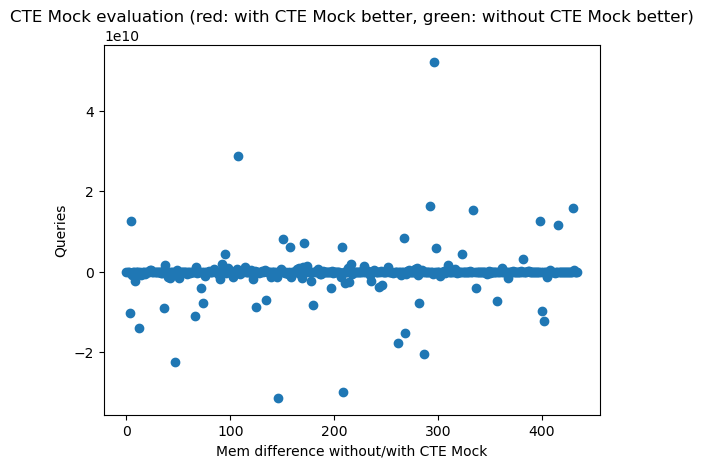

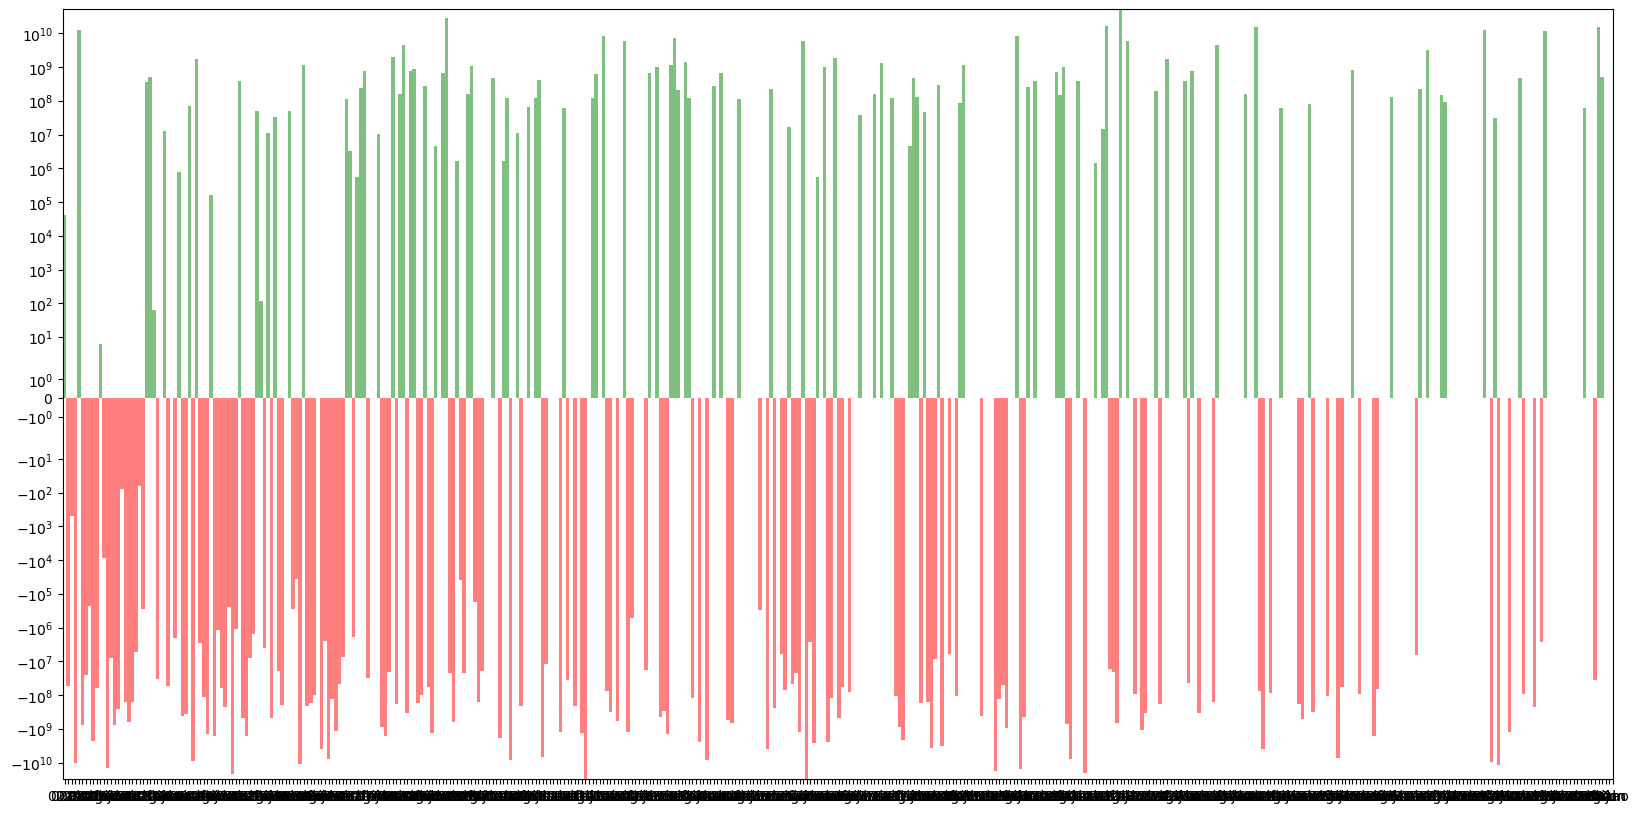

In [46]:
diffPlot2(maxmemlist1, maxmemlist2, "Mem difference without/with CTE Mock", "Queries", "CTE Mock evaluation (red: with CTE Mock better, green: without CTE Mock better)", "./CTEMockEvalMemRGPlot.png", queries)


In [47]:
def diffPlot(normal, yan, xlabel, ylabel, title, pathToSave, xticks):
  diffs = np.subtract(np.array(yan), np.array(normal))
  x = [x for x in range(0,len(normal))]
  plt.scatter(x, diffs)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  #plt.grid()
  fig, ax = plt.subplots()
  fig.set_size_inches(180.5, 10.5)
  print(np.min(diffs))
  plt.yscale('symlog')
  plt.ylim(np.min(diffs)-5,np.max(diffs)+5)
  plt.xlim(-0.5,len(normal)+0.5)

  plt.xticks(x, labels=xticks)

  for i in range(0,len(normal)):
    if diffs[i]>0:
      #plt.fill_between(i, diffs[i], facecolor='green', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'g', alpha=.5)
    elif diffs[i]<0:
      #plt.fill_between(i, diffs[i], facecolor='red', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'r', alpha=.5)

  plt.savefig(pathToSave)
  plt.show()



